# [ICTCOG AI Academy] 7기 고급시각저녁반

### 경량화 CNN 모델 / transfer/incremental learning
- 일반적 ML은 plateau 현상 발생
- 레이어가 많은 신경망모델은  plateau 현상이 덜 함
- Raw data보다 Featured Data로 사용하면 성능이 더 좋음

### CNN 발전
- 1989/1998 Lenet
- 2012 Alexnet
- 2013 ZFnet
- 2014 GoogLeNet 
- 2014 VGG
- 2015 Resnet
- 2016 Ensemble
- 2017 Light model
  - 경량화
  - 적은 파라미터로 성능 유지
  - 빠른 학습, 예측

#### Transfer Learning
- 이미 학습된 모델을 이용하여 유사한 다른 문제에 적용 

#### Catastrophic Forgetting
- 하나를 학습하면 이전에 학습한것을 망각하게 됨

#### Incremental/Continous Larening
- 기본에서 추가해서 학습 가능
- 딥러닝의 강인공지능으로 만들기위한 분야


- 레이어가 깊어지면서 추상적 특징 추출가능 

> Q:1000개 분류 할 수 있는 능력이 있는 모델에 새로운 클래스 분류 할 수 있는 능력이 있을까 ?
  -  A: 있다.

- 데이터 세트의 양, 문제 유사성에 따라서 Approach 달라짐
  - Feature extraction : 유사하고 데이터가 적은 경우
    - Feature Selection 부분은 놔두고 Dense 부분만 학습
  - Fine Tuning : 유사하지 않고 데이터 양이 많은 경우
    - 이미 학습된 모델 전체를 가져와서 재학습


### TensorFlow 이용하는 방법 3가지
#### 1. TensorFlow Hub
  - Problem Domain ,TF Version, Model Format 등을 기준으로 이미 학습된 모델들을 공유함 

#### 2. tf.keras,applications
  - 범용적

#### 3. TF Model Garden



In [1]:
import tensorflow as tf

In [2]:
res= tf.keras.applications.ResNet152(include_top=False ) #feature 만 가져와서 Dense 만 추가해서 학습

234700800/234698864 [==============================] - 2s 0us/step


In [3]:
inputs= tf.keras.Input(shape=(224,224,3))  #3차원 
x=res(inputs )
outputs=tf.keras.layers.Dense(5)(x)
model=tf.keras.Model(inputs=inputs, outputs=outputs )

In [4]:
res.trainble = False #학습 못하도록 fixed

1. [Model Zoo](https://modelzoo.co/)
  - Framework,도메인 별  다양한 모델들이 모여 있음
2. [SOTA](https://paperswithcode.com/sota)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [6]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 1s 0us/step


tf.data.Dataset 으로 만들면 편리하게 사용 가능

In [7]:
train_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.3 ,
                                                              subset='training', seed=41,
                                                              image_size=(180,180), batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.


In [8]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.3 ,
                                                              subset='validation', seed=41,
                                                              image_size=(180,180), batch_size=32)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [9]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [10]:
for i,j in train_ds:
  print(i,j)
  break

tf.Tensor(
[[[[4.51234609e-01 5.98148227e-01 1.98271596e+00]
   [4.31666613e+00 4.62777758e+00 3.27037048e+00]
   [5.98456764e+00 8.38641930e+00 2.50802493e+00]
   ...
   [6.30667686e+00 9.46096992e+00 2.43456173e+00]
   [4.21301413e+00 6.30746460e+00 3.72594595e+00]
   [4.09257382e-01 1.01851130e+00 3.58520508e+00]]

  [[1.25555539e+00 1.59259248e+00 0.00000000e+00]
   [2.88888991e-01 7.22222477e-02 1.77222300e+00]
   [1.32407391e+00 1.25185168e+00 9.65740681e+00]
   ...
   [4.09251869e-01 9.75918591e-01 8.89069653e+00]
   [3.61115485e-01 2.01112866e+00 1.07771194e+00]
   [1.63148081e+00 2.52591753e+00 2.64816254e-01]]

  [[5.98765492e-01 2.33024740e+00 5.14197683e+00]
   [5.35185289e+00 4.87963104e+00 8.70370483e+00]
   [5.56172943e+00 5.66666794e+00 5.73456764e+00]
   ...
   [1.04970321e-01 3.17981154e-01 3.24070007e-01]
   [6.61117029e+00 7.13891888e+00 7.89824438e+00]
   [1.90430546e+00 2.34567618e+00 6.24377394e+00]]

  ...

  [[1.20370495e+00 3.08024931e+00 5.50924969e+00]
   [9

In [11]:
for i,j in train_ds.take(2):
  print(i,j)

tf.Tensor(
[[[[8.47870331e+01 8.66203690e+01 7.22870331e+01]
   [8.25277786e+01 8.43611069e+01 7.00277786e+01]
   [7.94259262e+01 8.12592621e+01 6.69259262e+01]
   ...
   [1.19824074e+02 1.20037048e+02 1.10481529e+02]
   [1.19666664e+02 1.22333351e+02 1.13833344e+02]
   [1.14888878e+02 1.21944435e+02 1.11833321e+02]]

  [[7.03055573e+01 6.93055573e+01 5.38055573e+01]
   [6.99166718e+01 6.89166718e+01 5.34166641e+01]
   [6.99722214e+01 6.89722214e+01 5.34722214e+01]
   ...
   [1.23972214e+02 1.25472214e+02 1.19027786e+02]
   [1.20166626e+02 1.23749985e+02 1.18249985e+02]
   [1.17305557e+02 1.23222229e+02 1.17416672e+02]]

  [[7.18425980e+01 6.63425980e+01 5.05092583e+01]
   [7.14722214e+01 6.59722214e+01 5.01388893e+01]
   [7.23240738e+01 6.68240738e+01 5.09907379e+01]
   ...
   [1.29879639e+02 1.33546310e+02 1.31879639e+02]
   [1.35111176e+02 1.39194504e+02 1.37666733e+02]
   [1.31944427e+02 1.37879608e+02 1.35546280e+02]]

  ...

  [[8.61481628e+01 9.31759491e+01 9.65000153e+01]
   [8

In [12]:
next(iter(train_ds))

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
 array([[[[1.55618820e+01, 1.85618820e+01, 1.15618820e+01],
          [1.50000000e+01, 1.80000000e+01, 1.06666660e+01],
          [1.50000000e+01, 1.80000000e+01, 9.00000000e+00],
          ...,
          [3.78888550e+01, 4.78888550e+01, 3.68888550e+01],
          [3.51666565e+01, 4.51666565e+01, 3.41666565e+01],
          [3.33888855e+01, 4.40000000e+01, 3.11666565e+01]],
 
         [[1.50000000e+01, 1.80000000e+01, 1.10000000e+01],
          [1.50000000e+01, 1.80000000e+01, 1.06666660e+01],
          [1.52282410e+01, 1.82282410e+01, 9.22824097e+00],
          ...,
          [3.76606178e+01, 4.76606178e+01, 3.66606178e+01],
          [3.49652634e+01, 4.49652634e+01, 3.39652634e+01],
          [3.32949066e+01, 4.39060211e+01, 3.10726757e+01]],
 
         [[1.47538586e+01, 1.77538586e+01, 1.07538586e+01],
          [1.50671301e+01, 1.80671291e+01, 1.07337961e+01],
          [1.59668207e+01, 1.89668217e+01, 9.96682072e+00],
    

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.experimental.AUTOTUNE )
val_ds=val_ds.prefetch(tf.data.experimental.AUTOTUNE )

In [14]:
val_ds=val_ds.prefetch(tf.data.experimental.AUTOTUNE )

In [15]:
vgg = tf.keras.applications.VGG16() #include_top=True 기본

553467904/553467096 [==============================] - 6s 0us/step


In [16]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
vgg = tf.keras.applications.VGG16(include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [18]:
vgg.summary() #Fully connected 없음

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [19]:
vgg = tf.keras.applications.VGG16(include_top=False , input_shape=(180,180,3),weights='imagenet') #input_shape 맞추기 

In [20]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [21]:
train_ds #X,y 값이 붙어 있음

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [22]:
for i,j in train_ds.take(1):
  pass

In [23]:
i #image  

<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[1.11674072e+02, 1.03453705e+02, 1.45491669e+02],
         [1.21866661e+02, 1.13866661e+02, 1.60938889e+02],
         [1.16220375e+02, 1.10109261e+02, 1.56188889e+02],
         ...,
         [1.64190796e+02, 1.62540802e+02, 1.94757462e+02],
         [1.66419434e+02, 1.62811081e+02, 1.95680527e+02],
         [1.62038879e+02, 1.55427765e+02, 1.89427765e+02]],

        [[1.10080551e+02, 1.02469444e+02, 1.42636108e+02],
         [1.16408333e+02, 1.08625000e+02, 1.55850006e+02],
         [1.14155556e+02, 1.08116669e+02, 1.55474991e+02],
         ...,
         [1.65505615e+02, 1.61505615e+02, 1.94505615e+02],
         [1.67333313e+02, 1.62249969e+02, 1.95791641e+02],
         [1.63341660e+02, 1.57777771e+02, 1.90477768e+02]],

        [[1.13398148e+02, 1.07009262e+02, 1.45342590e+02],
         [1.20361107e+02, 1.12666672e+02, 1.61930557e+02],
         [1.18851852e+02, 1.12087967e+02, 1.63009247e+02],
         ...,
         [

In [24]:
j #label

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([4, 1, 3, 1, 3, 3, 4, 0, 0, 1, 4, 3, 1, 4, 3, 0, 0, 2, 1, 2, 4, 3,
       2, 1, 1, 0, 2, 1, 4, 4, 2, 1], dtype=int32)>

In [25]:
vgg(i)

<tf.Tensor: shape=(32, 5, 5, 512), dtype=float32, numpy=
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 1.3849710e+01, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0

- 컨볼루션은 크기와 상관이 없다.
- Dense 에서는 상관이 있다.

In [26]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [27]:
vgg.trainable=False #Frozen : 업데이트되지 않고 고정(fixed)

In [28]:
vgg.summary() #Trainable params: 0

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [29]:
gap = tf.keras.layers.GlobalAveragePooling2D()
outputs=tf.keras.layers.Dense(5,activation='softmax')  #5 classes

In [30]:
outputs(gap(vgg(i)))  #함수형 패러다임 방식   32,5 (batchsize, 5 classes)

<tf.Tensor: shape=(32, 5), dtype=float32, numpy=
array([[2.31679282e-04, 2.63154817e-07, 9.99768078e-01, 1.34590093e-13,
        8.63088281e-11],
       [5.01526145e-08, 1.55289227e-14, 9.99999881e-01, 1.26874555e-09,
        6.80624552e-08],
       [4.43076342e-02, 3.82766803e-03, 9.51811194e-01, 1.76249978e-05,
        3.59556398e-05],
       [9.94808674e-01, 2.81584216e-03, 5.19588923e-07, 2.37496640e-03,
        2.94482416e-09],
       [1.43987811e-04, 3.82634171e-05, 9.99817312e-01, 6.12000903e-08,
        4.03714580e-07],
       [2.63486020e-02, 7.41551518e-01, 2.32099742e-01, 3.43558924e-08,
        5.96596195e-08],
       [1.86616257e-02, 3.51673916e-05, 9.80919063e-01, 2.23396952e-12,
        3.84111045e-04],
       [2.64529826e-05, 1.25267236e-02, 9.86748874e-01, 6.96914678e-04,
        9.80163804e-07],
       [2.24172324e-03, 1.71755612e-01, 5.52502275e-01, 5.25777636e-04,
        2.72974581e-01],
       [8.36458147e-01, 1.61332253e-04, 1.63335294e-01, 2.57395113e-05,
      

In [31]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [32]:
inputs= tf.keras.Input(shape=(180,180,3))
x=vgg(inputs)
x=gap(x)   #Fully connected 대신에 GAP
outputs=outputs(x)

In [33]:
model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [34]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam', metrics=['acc'])

In [35]:
history=model.fit(train_ds,validation_data=val_ds, epochs=10)

Epoch 1/10
81/81 [==============================] - 20s 186ms/step - loss: 5.7223 - acc: 0.3058 - val_loss: 2.0507 - val_acc: 0.6431
Epoch 2/10
81/81 [==============================] - 11s 139ms/step - loss: 1.6193 - acc: 0.6999 - val_loss: 1.5543 - val_acc: 0.7112
Epoch 3/10
81/81 [==============================] - 11s 142ms/step - loss: 1.1035 - acc: 0.7716 - val_loss: 1.4092 - val_acc: 0.7248
Epoch 4/10
81/81 [==============================] - 12s 147ms/step - loss: 0.8085 - acc: 0.8217 - val_loss: 1.2381 - val_acc: 0.7330
Epoch 5/10
81/81 [==============================] - 12s 150ms/step - loss: 0.6502 - acc: 0.8398 - val_loss: 1.1679 - val_acc: 0.7439
Epoch 6/10
81/81 [==============================] - 12s 146ms/step - loss: 0.5306 - acc: 0.8620 - val_loss: 1.1270 - val_acc: 0.7530
Epoch 7/10
81/81 [==============================] - 12s 144ms/step - loss: 0.3920 - acc: 0.8823 - val_loss: 1.0935 - val_acc: 0.7593
Epoch 8/10
81/81 [==============================] - 11s 142ms/step - 

In [37]:
import pandas as pd

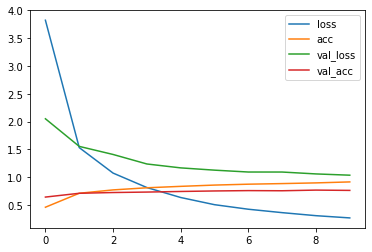

In [38]:
data= pd.DataFrame(history.history)
data.plot.line() #epochs=10 이하여도 충분

In [39]:
history.history['val_acc']  #validation accuracy76%

[0.6430517435073853,
 0.7111716866493225,
 0.7247956395149231,
 0.7329699993133545,
 0.7438691854476929,
 0.7529518604278564,
 0.759309709072113,
 0.7565849423408508,
 0.7683923840522766,
 0.7629427909851074]

Flatten 해서 모델 만들어서 비교

In [68]:
vgg=tf.keras.applications.VGG16(include_top=False, input_shape=(180,180,3))

In [69]:
inputs= tf.keras.Input(shape=(180,180,3))
x=vgg(inputs)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(128, activation='relu')(x)
outputs=tf.keras.layers.Dense(5)(x)

In [70]:
model1=tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [71]:
model1.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 180, 180, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1638528   
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 645       
Total params: 16,353,861
Trainable params: 16,353,861
Non-trainable params: 0
_________________________________________________________________


In [72]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam', metrics=['acc'])
history=model1.fit(train_ds,validation_data=val_ds, epochs=10)

Epoch 1/10
81/81 [==============================] - 30s 325ms/step - loss: 26.2989 - acc: 0.2642 - val_loss: 1.4418 - val_acc: 0.3924
Epoch 2/10
81/81 [==============================] - 26s 321ms/step - loss: 1.3755 - acc: 0.4082 - val_loss: 1.2985 - val_acc: 0.4269
Epoch 3/10
81/81 [==============================] - 26s 322ms/step - loss: 1.2638 - acc: 0.4672 - val_loss: 1.2214 - val_acc: 0.4968
Epoch 4/10
81/81 [==============================] - 25s 314ms/step - loss: 1.1617 - acc: 0.5311 - val_loss: 1.1479 - val_acc: 0.5386
Epoch 5/10
81/81 [==============================] - 26s 316ms/step - loss: 1.1110 - acc: 0.5353 - val_loss: 1.1776 - val_acc: 0.5123
Epoch 6/10
81/81 [==============================] - 26s 321ms/step - loss: 1.0760 - acc: 0.5594 - val_loss: 1.1378 - val_acc: 0.5350
Epoch 7/10
81/81 [==============================] - 26s 320ms/step - loss: 1.0483 - acc: 0.5592 - val_loss: 1.1180 - val_acc: 0.5459
Epoch 8/10
81/81 [==============================] - 26s 318ms/step -

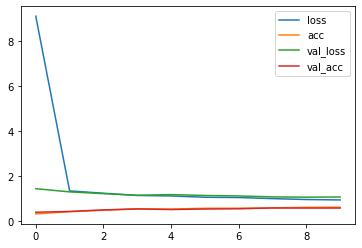

In [73]:
data2= pd.DataFrame(history.history)
data2.plot.line() #epochs=10 이하여도 충분

Dense를 안쓰고 outputs 으로만 

In [55]:
vgg.layers

In [57]:
vgg.layers[-2].traniable=True  #끝에서 두번째만 

특정 레이어만 trainable 바꾸는 법

In [60]:
vgg=tf.keras.applications.VGG16(include_top=False, input_shape=(180,180,3))
vgg.trainable= False
vgg.layers[-2].traniable=True
x=vgg(inputs)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(128, activation='relu')(x)
outputs=tf.keras.layers.Dense(5)(x)
model2=tf.keras.models.Model(inputs=inputs, outputs=outputs)
model2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 180, 180, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1638528   
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 645       
Total params: 16,353,861
Trainable params: 1,639,173
Non-trainable params: 14,714,688
_________________________________________________________________


- GPU 활용 , 우연하게 바꿈

In [ ]:
tf.keras.layers.experimental.preprocessing.Rescaling

In [65]:
inputs= tf.keras.Input(shape=(180,180,3))
x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255)(inputs)
x=vgg(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(128, activation='relu')(x)
outputs=tf.keras.layers.Dense(5)(x)

model3=tf.keras.models.Model(inputs=inputs, outputs=outputs)
model3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1638528   
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 645       
Total params: 16,353,861
Trainable params: 1,639,173
Non-trainable params: 14,714,688
_______________________________________

In [66]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam', metrics=['acc'])
history=model3.fit(train_ds,validation_data=val_ds, epochs=10)

Epoch 1/10
81/81 [==============================] - 12s 137ms/step - loss: 1.3088 - acc: 0.5523 - val_loss: 0.6594 - val_acc: 0.7748
Epoch 2/10
81/81 [==============================] - 11s 134ms/step - loss: 0.4296 - acc: 0.8498 - val_loss: 0.6363 - val_acc: 0.7820
Epoch 3/10
81/81 [==============================] - 11s 135ms/step - loss: 0.2262 - acc: 0.9327 - val_loss: 0.5672 - val_acc: 0.8084
Epoch 4/10
81/81 [==============================] - 11s 137ms/step - loss: 0.1415 - acc: 0.9695 - val_loss: 0.6401 - val_acc: 0.7893
Epoch 5/10
81/81 [==============================] - 11s 141ms/step - loss: 0.0627 - acc: 0.9950 - val_loss: 0.6342 - val_acc: 0.8129
Epoch 6/10
81/81 [==============================] - 12s 147ms/step - loss: 0.0388 - acc: 0.9992 - val_loss: 0.6241 - val_acc: 0.8065
Epoch 7/10
81/81 [==============================] - 12s 153ms/step - loss: 0.0347 - acc: 0.9984 - val_loss: 0.6702 - val_acc: 0.8047
Epoch 8/10
81/81 [==============================] - 12s 152ms/step - 

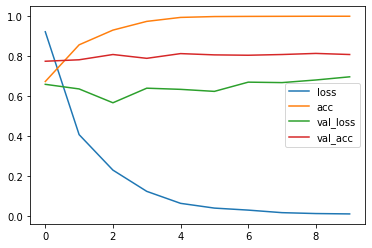

In [67]:
data2= pd.DataFrame(history.history)
data2.plot.line() #epochs=10 이하여도 충분

### [TF hub](https://tfhub.dev/)
- image classification, TF@ ,fine tunable


In [74]:
import tensorflow_hub as hub

In [ ]:
!pip install -U tensorflow-hub

KerasLayer  이용해서 링크를 통해서 가져옴

In [76]:
mobile = hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4')

In [77]:
mobile #keras_layer.KerasLayer  레이어지만 모델 

In [78]:
mobile.weights[0].shape  

TensorShape([3, 3, 48, 1])

In [84]:
mobile(i) #mobilenet 224,224,3 으로 고정 되어 있어서 사이즈 맞지않아 에러

ValueError: ignored

In [86]:
train_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.3 ,
                                                              subset='training', seed=41,
                                                              image_size=(224,224), batch_size=32)

for i,j in train_ds.take(1):
  pass

Found 3670 files belonging to 5 classes.
Using 2569 files for training.


In [87]:
mobile(i) #모델에 이미지 크기를 맞추었더니 가능

<tf.Tensor: shape=(32, 1001), dtype=float32, numpy=
array([[ 0.4269457 , -0.3761504 ,  0.96459174, ..., -3.482328  ,
         0.65371335,  2.1377404 ],
       [ 0.55681294,  1.6271641 ,  1.2164123 , ...,  0.4928784 ,
         3.9897544 , -1.8897812 ],
       [ 0.4751374 , -0.17787558,  0.11204198, ..., -3.2213995 ,
         3.8268213 ,  2.7966433 ],
       ...,
       [ 0.3381192 ,  1.6218548 , -1.0015539 , ..., -3.5346637 ,
         2.2064261 , -0.79624844],
       [ 0.64689654,  1.6507225 ,  2.2620647 , ..., -1.111521  ,
         0.7703273 ,  1.532798  ],
       [ 0.23773873,  0.9950699 ,  0.6048336 , ..., -2.0951984 ,
         3.8073037 , -0.05672549]], dtype=float32)>

In [89]:
inputs=tf.keras.Input(shape=(224,224,3))
mobile = hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4')
outputs =mobile(inputs)

In [90]:
model=tf.keras.models.Model(inputs=inputs, outputs=outputs )

- 레이어로 모델 전체 하나를 표현
- Transfer Learning으로 전체 재학습에 적합



In [93]:
model.summary() 

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1001)              6158505   
Total params: 6,158,505
Trainable params: 0
Non-trainable params: 6,158,505
_________________________________________________________________


### Data Augmentation
- 과적합 방지
- 데이터가 적을 떄 one-shot, few-shot 기법 사용
#### ImageDataGenerator
- 받은 데이터를 생성한 후 변환
- TF에서는 학습 방법도 바뀜
- 메모리 충분하지 않은 경우 유용
  - generator: Laqzy 방식으로 메모리 효율성 보장, 호출시 메모리에 올라감
  > prefetch, autotune은 메모리 충분한 경우

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator #data augmentaion 쉽게 사용 

In [ ]:
model.fit_generator #학습 방법도 바뀜